In [3]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5a/f2/5c2f878c62c8b79c629b11b33516bb55054d7677eba6f56f3a20296b56bd/tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for grpcio<2.0,>=1.24.3 from https://files.pythonhosted.org/packages/28/fa/c38a010d3fffcac07ef121abb34eb2c3db0876df74267ce5bde13c3a6ed7/grpcio-1.57.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for h5py>=2.9.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow import keras
from tensorflow.keras import layers
file1 = open('/home/ikm/Downloads/IMDB Dataset.csv', 'r').readlines()
fileout = open('/home/ikm/Downloads/IMDB Dataset1.csv', 'w')
for line in file1:
    fileout.write(line.replace('<br />',' '))#remove <br />

fileout.close()
dataname = "/home/ikm/Downloads/IMDB Dataset1.csv"

data = pd.read_csv(dataname)
data['sentiment']=data['sentiment']
data['sentiment']=data['sentiment'].map({'positive':1,'negative':0})
print(data.head())

X=data['review'].values
Y=data['sentiment'].values

2023-08-23 11:17:25.207581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 11:17:25.855671: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production.   The filming t...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [2]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string
import re
import tensorflow as tf
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data) #轉小寫
    return tf.strings.regex_replace(
        lowercase, "[%s]" % re.escape(string.punctuation), "" #去除標點符號
    )


# 參數設定
max_features = 50000 #考慮字彙數量
embedding_dim = 128  #每個查詢向量維度
sequence_length = 500 #輸入資料長度


vectorize_layer = TextVectorization(
    standardize=custom_standardization, #轉小寫資料
    max_tokens=max_features,
    output_mode="int", #輸出為int
    output_sequence_length=sequence_length,
)
vectorize_layer.adapt(X)

2023-08-23 11:17:28.958520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-23 11:17:28.958799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-23 11:17:28.987383: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [3]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

In [4]:
print(X_train.shape)
print(X_test.shape)


(40000,)
(10000,)


In [5]:
type(X_train)

numpy.ndarray

In [10]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


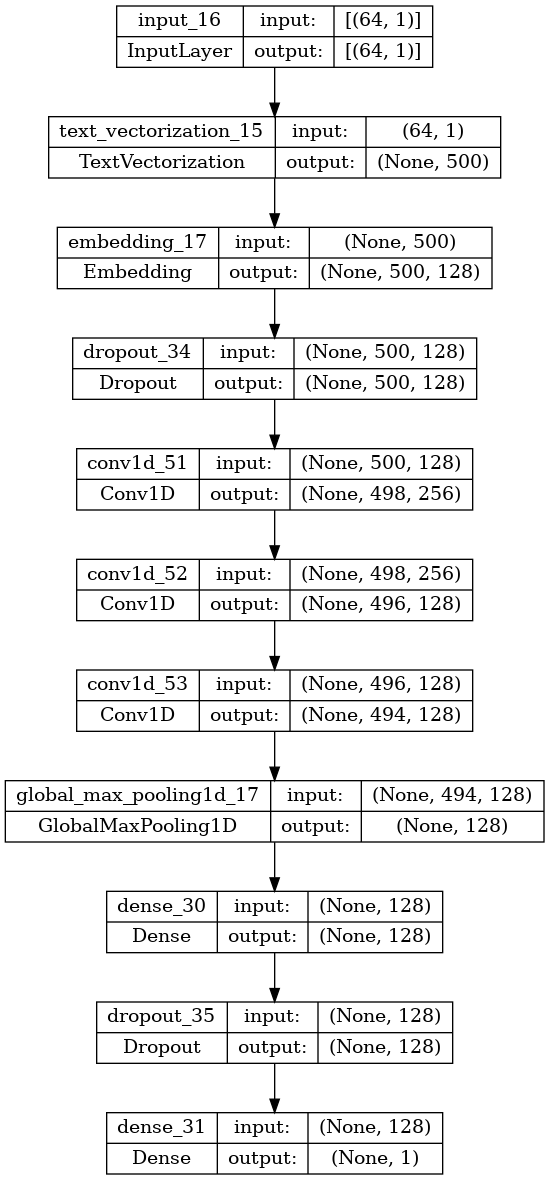

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, TextVectorization, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.utils import plot_model

# 創建模型，這裡使用-1來代替None
model = Sequential([
    InputLayer(input_shape=(1,),batch_size=64),  # 使用-1代替None
    TextVectorization(output_mode='int', output_sequence_length=500),
    Embedding(input_dim=50000, output_dim=128, input_length=500),
    Dropout(0.2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 將模型結構視覺化並保存為圖片
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)


In [6]:
from tensorflow.keras import layers

text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorize_layer(text_input)  #將資料向量化
x = layers.Embedding(max_features + 1, embedding_dim)(x) #維度128
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(256, 7, padding="valid", activation="relu", strides=3)(x) #一維捲積層 strides=移動步長
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x) #池化層

x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x) #分類

model = tf.keras.Model(text_input, predictions)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
print(model.summary())
for layer in model.layers:
    print(layer.name, layer.input_shape)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text (InputLayer)           [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 500)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 500, 128)          6400128   
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 165, 256)          229632    
                                                                 
 conv1d_1 (Conv1D)           (None, 53, 128)           229504    
                                                             

In [7]:
epochs = 3
his = model.fit(X_train,Y_train,batch_size = 128,validation_split = 0.2, epochs=epochs)


Epoch 1/3
250/250 [==============================] - 47s 185ms/step - loss: 0.5567 - accuracy: 0.6561 - val_loss: 0.3092 - val_accuracy: 0.8691
Epoch 2/3
250/250 [==============================] - 46s 184ms/step - loss: 0.2226 - accuracy: 0.9131 - val_loss: 0.2568 - val_accuracy: 0.8978
Epoch 3/3
250/250 [==============================] - 45s 179ms/step - loss: 0.0942 - accuracy: 0.9666 - val_loss: 0.3133 - val_accuracy: 0.8841


In [8]:
print(model.evaluate(X_test,Y_test))

313/313 [==============================] - 3s 10ms/step - loss: 0.3007 - accuracy: 0.8905
[0.3007342219352722, 0.890500009059906]


In [9]:
print(X_test.shape)

(10000,)
